In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

# Try reading the CSV file with a different encoding
try:
    store = pd.read_csv("Sample-Superstore.csv", encoding='latin-1')
except UnicodeDecodeError:
    print("Error: Unable to read the file with 'latin-1' encoding.")
    try:
        store = pd.read_csv("Sample-Superstore.csv", encoding='utf-16')
    except UnicodeDecodeError:
        print("Error: Unable to read the file with 'utf-16' encoding.")

In [3]:

## renaming of the columns to get rid of the space in between column names 
store.rename(columns={"Row ID":"RowID","Order ID": "OrderID", "Order Date": "OrderDate", "Ship Date": "ShipDate", "Ship Mode": "ShipMode", "Customer ID": "CustomerID", "Customer Name": "CustomerName", "Postal Code": "PostalCode", "Product ID": "ProductID","Sub-Category":"SubCategory", "Product Name": "ProductName"}, inplace=True)


In [4]:


## ProductPrice is the vPrrice per unit of Product  is sold
store['ProductPrice'] = ((store['Sales'] / store['Quantity'])/ (1-store['Discount'])).round(2)

## SupplierPrice is the Prrice per unit of Product  is bought
store['SupplierPrice'] = ((store['Sales'] - store['Profit']) / store['Quantity']).round(2)





In [5]:
#We need to fix OrderDate and ship date to be YYYY/MM/DD (can be ordered easily even when seen as a string). 
store[['OrderDate','ShipDate']] = store[['OrderDate','ShipDate']].apply(pd.to_datetime)

In [6]:
store_df=store.copy()

In [7]:
store_df.tail(2)

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit,ProductPrice,SupplierPrice
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.0,13.320,7.40,4.07
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.0,72.948,121.58,85.11


In [8]:
store_df["ShipMode"].nunique()

4

In [9]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   RowID          9994 non-null   int64         
 1   OrderID        9994 non-null   object        
 2   OrderDate      9994 non-null   datetime64[ns]
 3   ShipDate       9994 non-null   datetime64[ns]
 4   ShipMode       9994 non-null   object        
 5   CustomerID     9994 non-null   object        
 6   CustomerName   9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  PostalCode     9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  ProductID      9994 non-null   object        
 14  Category       9994 non-null   object        
 15  SubCategory    9994 n

In [10]:
store_df.describe().T

,count,mean,min,25%,50%,75%,max,std
RowID,9994.0,4997.5,1.0,2499.25,4997.5,7495.75,9994.0,2885.163629
OrderDate,9994,2016-04-30 00:07:12.259355648,2014-01-03 00:00:00,2015-05-23 00:00:00,2016-06-26 00:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
ShipDate,9994,2016-05-03 23:06:58.571142912,2014-01-07 00:00:00,2015-05-27 00:00:00,2016-06-29 00:00:00,2017-05-18 00:00:00,2018-01-05 00:00:00,NaN
PostalCode,9994.0,55190.379428,1040.0,23223.0,56430.5,90008.0,99301.0,32063.69335
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452
Profit,9994.0,28.656896,-6599.978,1.72875,8.6665,29.364,8399.976,234.260108
ProductPrice,9994.0,75.571127,0.99,6.48,19.98,76.98,7546.16,188.961461
SupplierPrice,9994.0,53.119794,0.54,3.47,12.93,54.52,4074.93,122.251172


### Time-based Analysis

In [11]:
"""""
What is the distribution of orders over time (daily, monthly, yearly)?
"""""

'""\nWhat is the distribution of orders over time (daily, monthly, yearly)?\n'

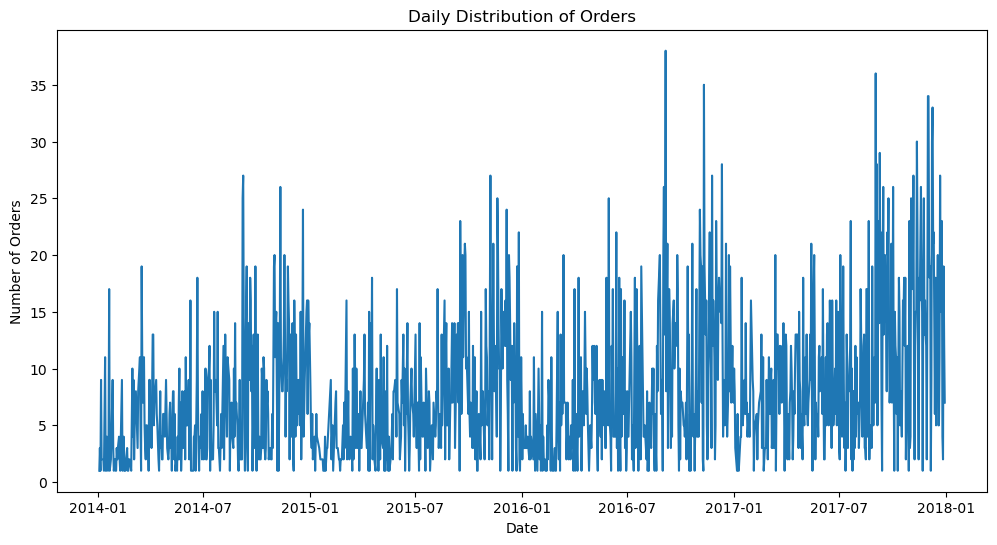

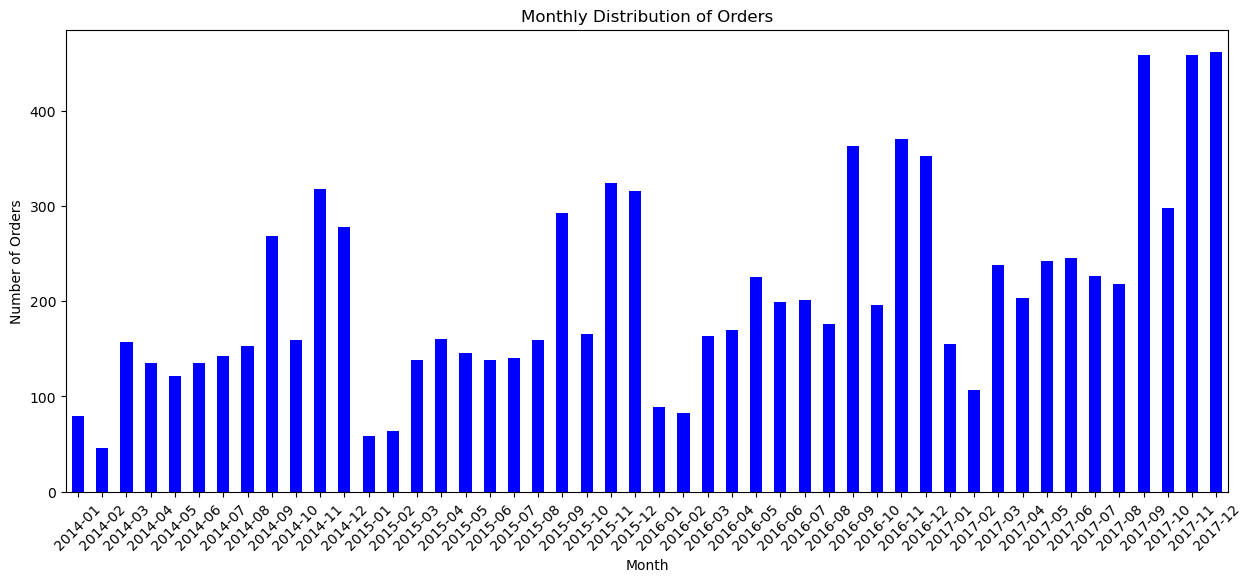

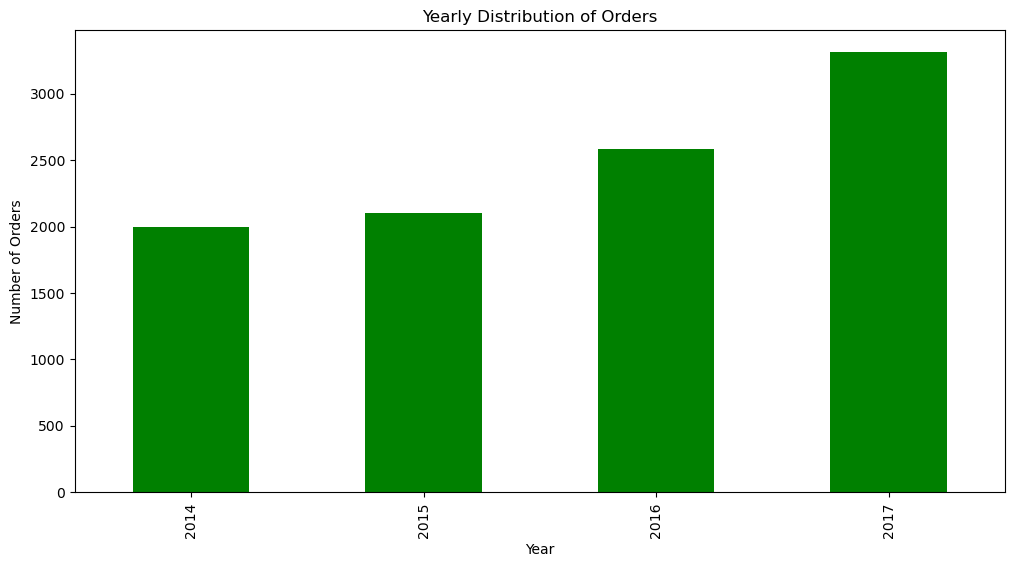

In [12]:
import matplotlib.pyplot as plt

# Daily distribution of orders
plt.figure(figsize=(12, 6))
store_df['OrderDate'].dt.date.value_counts().sort_index().plot()
plt.title('Daily Distribution of Orders')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

# Monthly distribution of orders
plt.figure(figsize=(15, 6))
store_df['OrderDate'].dt.to_period('M').value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Monthly Distribution of Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Yearly distribution of orders
plt.figure(figsize=(12, 6))
store_df['OrderDate'].dt.to_period('Y').value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Yearly Distribution of Orders')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.show()


In [13]:
"""""
Are there any seasonal trends in sales based on order date?
"""

'""\nAre there any seasonal trends in sales based on order date?\n'

c:\Users\godwi\Downloads\Anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\godwi\Downloads\Anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


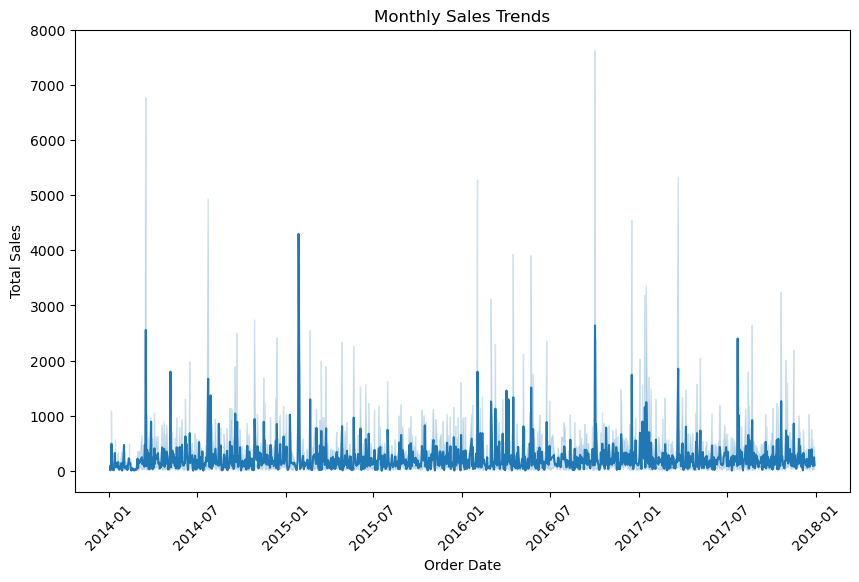

In [14]:
# Monthly sales trends
plt.figure(figsize=(10, 6))
sns.lineplot(x=store_df['OrderDate'], y=store_df['Sales'])
plt.title('Monthly Sales Trends')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [15]:
""""
How does the shipping duration (ShipDate - OrderDate) vary across different ship modes?
"""

'"\nHow does the shipping duration (ShipDate - OrderDate) vary across different ship modes?\n'

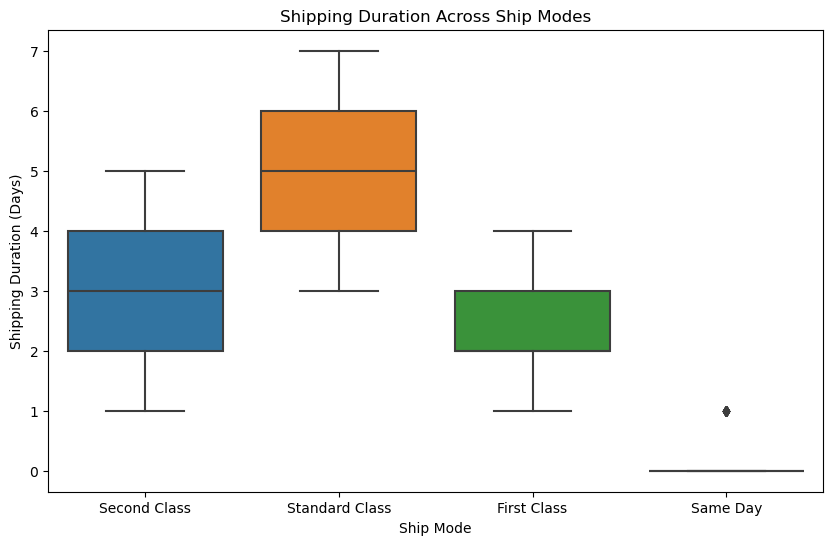

In [16]:
# Calculate shipping duration
store_df['ShippingDuration'] = (store_df['ShipDate'] - store_df['OrderDate']).dt.days

# Box plot of shipping duration by ship mode
plt.figure(figsize=(10, 6))
sns.boxplot(x='ShipMode', y='ShippingDuration', data=store_df)
plt.title('Shipping Duration Across Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Shipping Duration (Days)')
plt.show()


In [17]:
"""Is there any correlation between order date and sales/profit?
"""

'Is there any correlation between order date and sales/profit?\n'

c:\Users\godwi\Downloads\Anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\godwi\Downloads\Anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


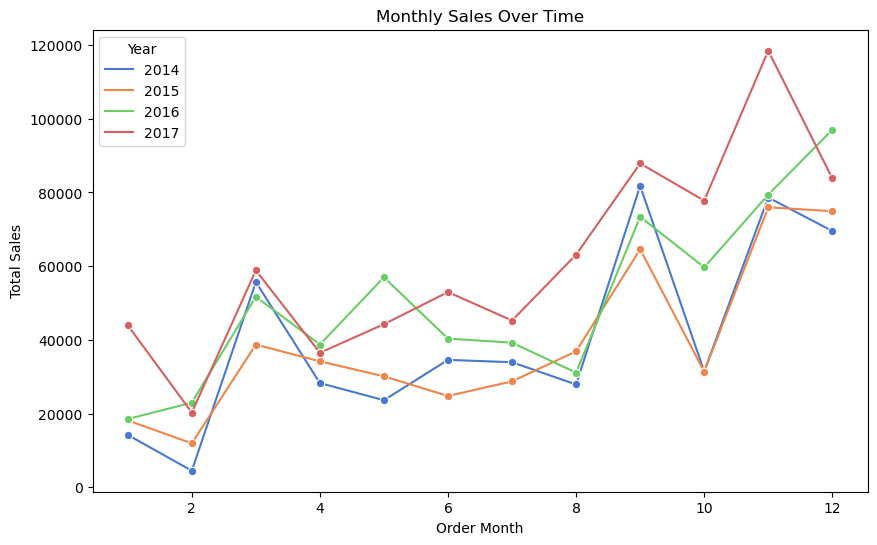

c:\Users\godwi\Downloads\Anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\godwi\Downloads\Anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


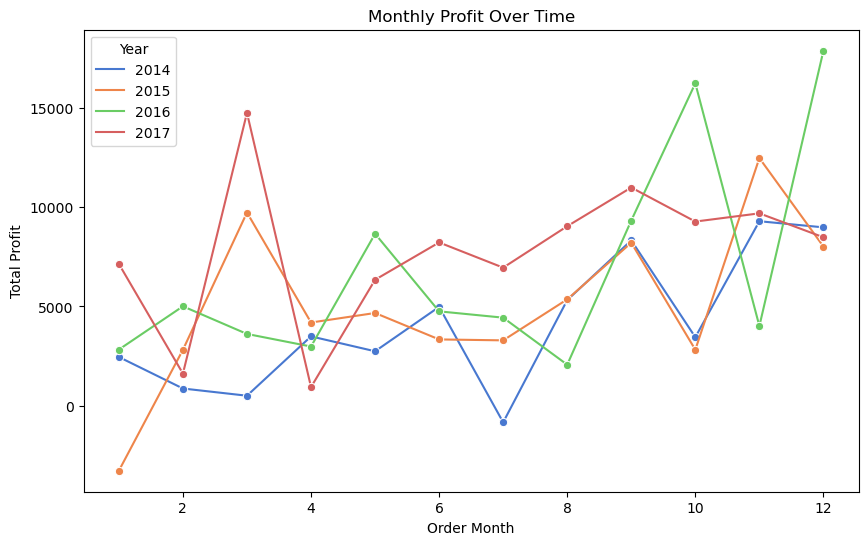

In [18]:
# Extract month and year from order date
store_df['OrderMonth'] = store_df['OrderDate'].dt.month
store_df['OrderYear'] = store_df['OrderDate'].dt.year

# Monthly sales and profit
monthly_sales_profit = store_df.groupby(['OrderYear', 'OrderMonth'])[['Sales', 'Profit']].sum().reset_index()


# Line plot of monthly sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='OrderMonth', y='Sales', hue='OrderYear', data=monthly_sales_profit, marker='o', palette='muted')
plt.title('Monthly Sales Over Time')
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.show()

# Line plot of monthly profit over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='OrderMonth', y='Profit', hue='OrderYear', data=monthly_sales_profit, marker='o', palette='muted')
plt.title('Monthly Profit Over Time')
plt.xlabel('Order Month')
plt.ylabel('Total Profit')
plt.legend(title='Year')
plt.show()


In [19]:
"""What customer purchasing patterns can you deduce? Such as during the days of the week, weekly, monthly, quarterly, yearly, etc."""

'What customer purchasing patterns can you deduce? Such as during the days of the week, weekly, monthly, quarterly, yearly, etc.'

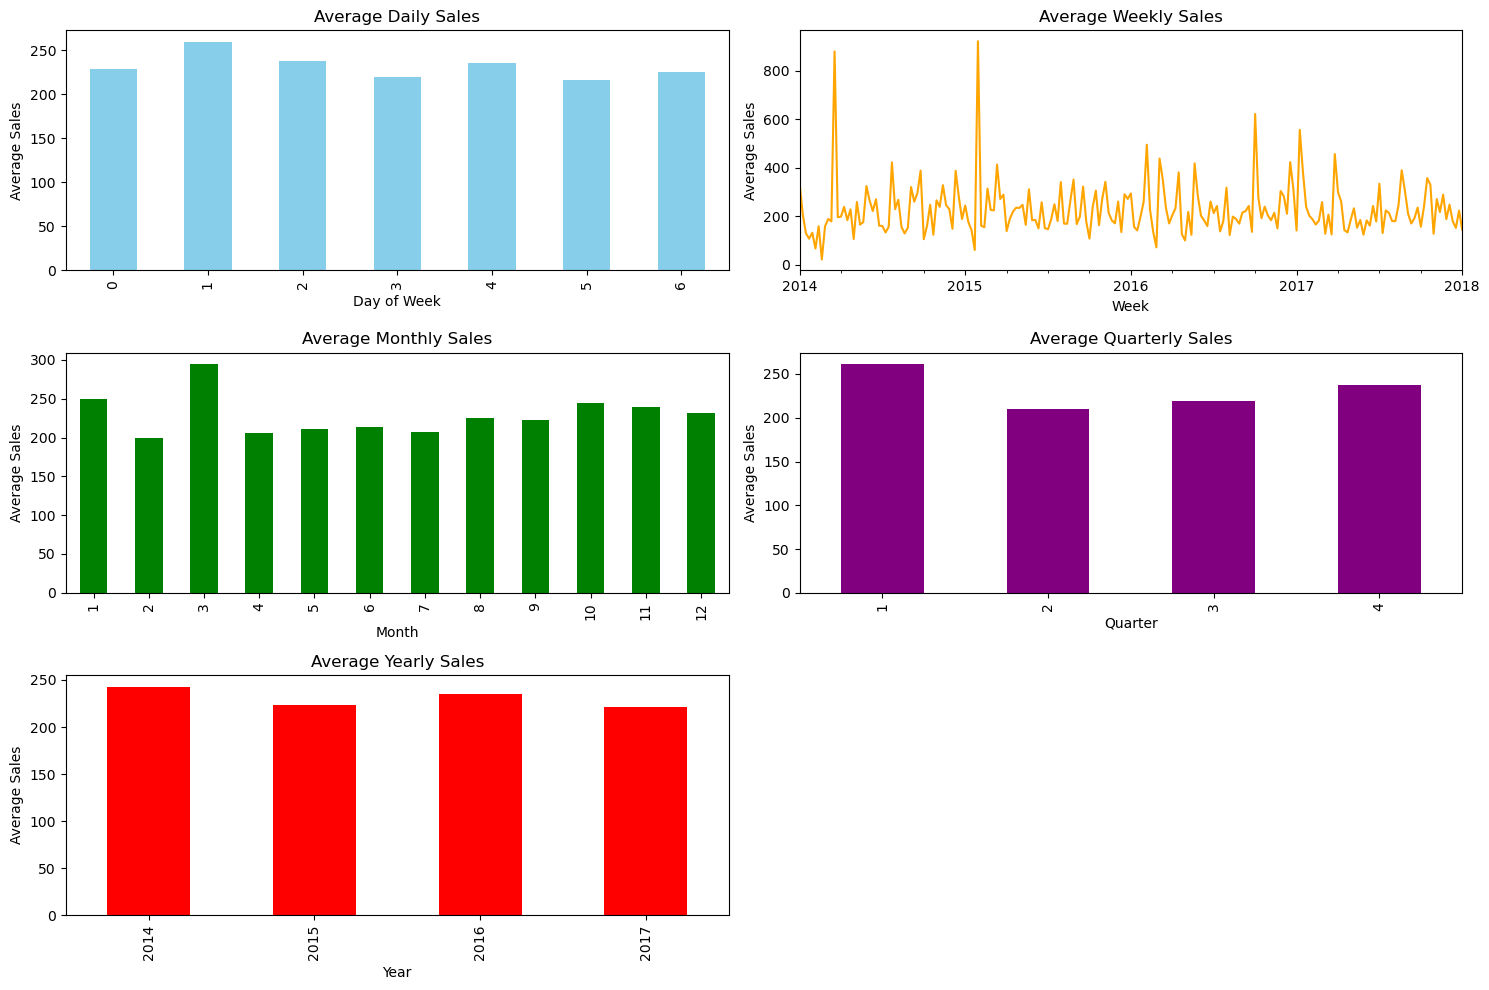

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'OrderDate' column to datetime format
store_df['OrderDate'] = pd.to_datetime(store_df['OrderDate'])

# Extract different time components from the 'OrderDate' column
store_df['DayOfWeek'] = store_df['OrderDate'].dt.dayofweek  # 0=Monday, 6=Sunday
store_df['Month'] = store_df['OrderDate'].dt.month
store_df['Quarter'] = store_df['OrderDate'].dt.quarter
store_df['Year'] = store_df['OrderDate'].dt.year

# Daily patterns
daily_sales = store_df.groupby('DayOfWeek')['Sales'].mean()

# Weekly patterns
weekly_sales = store_df.resample('W-Mon', on='OrderDate')['Sales'].mean()

# Monthly patterns
monthly_sales = store_df.groupby('Month')['Sales'].mean()

# Quarterly patterns
quarterly_sales = store_df.groupby('Quarter')['Sales'].mean()

# Yearly patterns
yearly_sales = store_df.groupby('Year')['Sales'].mean()

# Plotting
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
daily_sales.plot(kind='bar', color='skyblue')
plt.title('Average Daily Sales')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')

plt.subplot(3, 2, 2)
weekly_sales.plot(color='orange')
plt.title('Average Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Average Sales')

plt.subplot(3, 2, 3)
monthly_sales.plot(kind='bar', color='green')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')

plt.subplot(3, 2, 4)
quarterly_sales.plot(kind='bar', color='purple')
plt.title('Average Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Average Sales')

plt.subplot(3, 2, 5)
yearly_sales.plot(kind='bar', color='red')
plt.title('Average Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Average Sales')

plt.tight_layout()
plt.show()


### Customer Segmentation


In [21]:
""""
What are the different customer segments, and how do they contribute to overall sales/profit?

"""

'"\nWhat are the different customer segments, and how do they contribute to overall sales/profit?\n\n'

In [22]:
import pandas as pd

# Assuming 'store_df' is your store_dfFrame containing customer store_df
# Group store_df by customer segments and calculate total sales and profit
segment_sales_profit = store_df.groupby('Segment')[['Sales', 'Profit']].sum()

# Display the total sales and profit by segment
print("Total Sales and Profit by Segment:")
segment_sales_profit


Total Sales and Profit by Segment:


,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


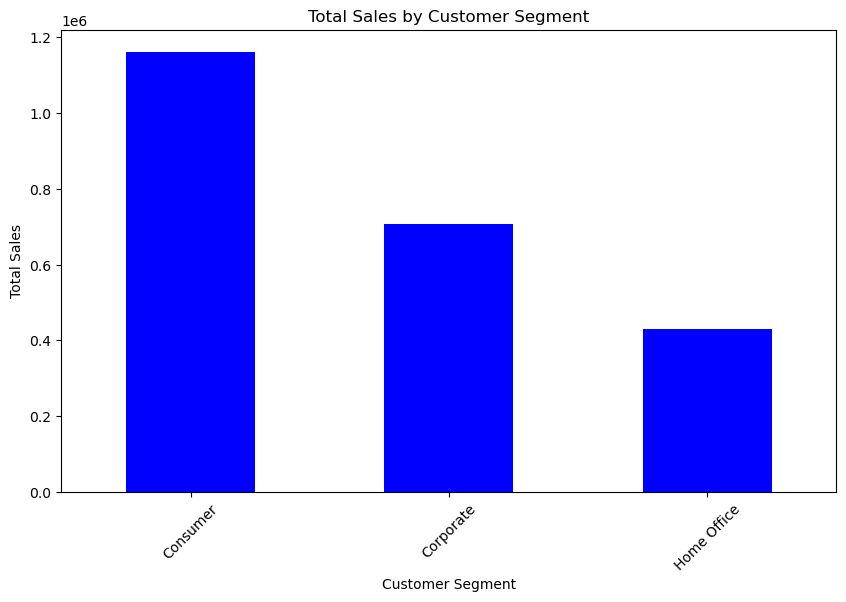

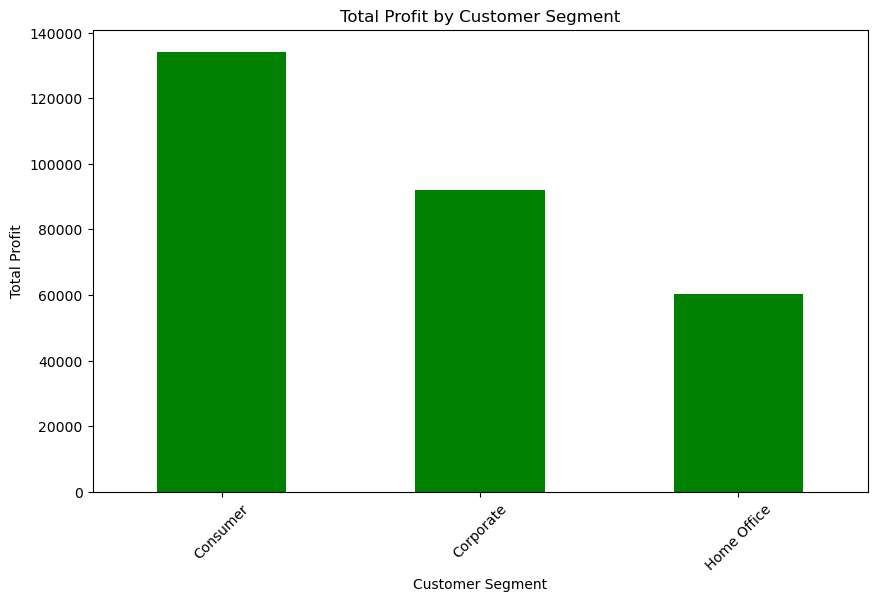

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'store_df' is your store_dfFrame containing customer store_df
# Group store_df by customer segments and calculate total sales and profit
segment_sales_profit = store_df.groupby('Segment')[['Sales', 'Profit']].sum()

# Plot total sales by segment
plt.figure(figsize=(10, 6))
segment_sales_profit['Sales'].plot(kind='bar', color='blue')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Plot total profit by segment
plt.figure(figsize=(10, 6))
segment_sales_profit['Profit'].plot(kind='bar', color='green')
plt.title('Total Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()


In [24]:
""""" How does the distribution of sales vary across different regions, state, or cities?
"""

'"" How does the distribution of sales vary across different regions, state, or cities?\n'

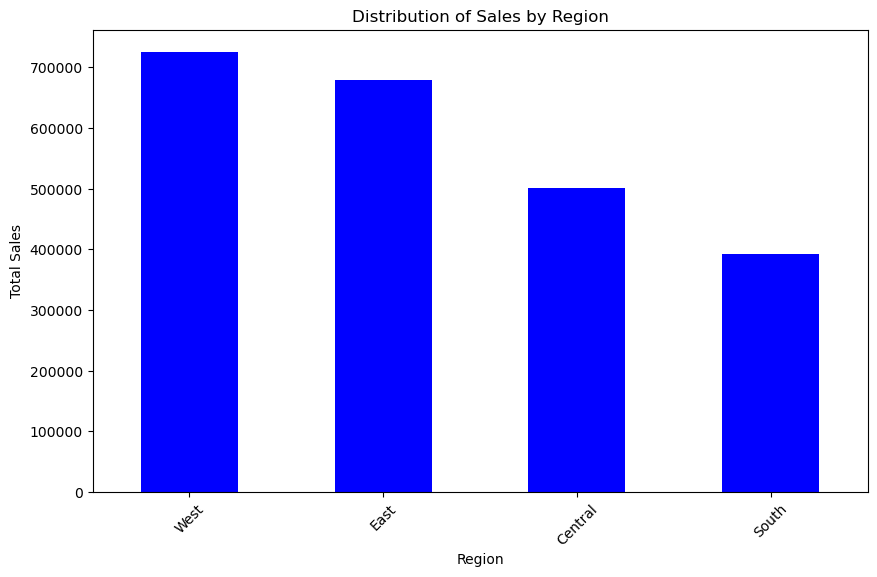

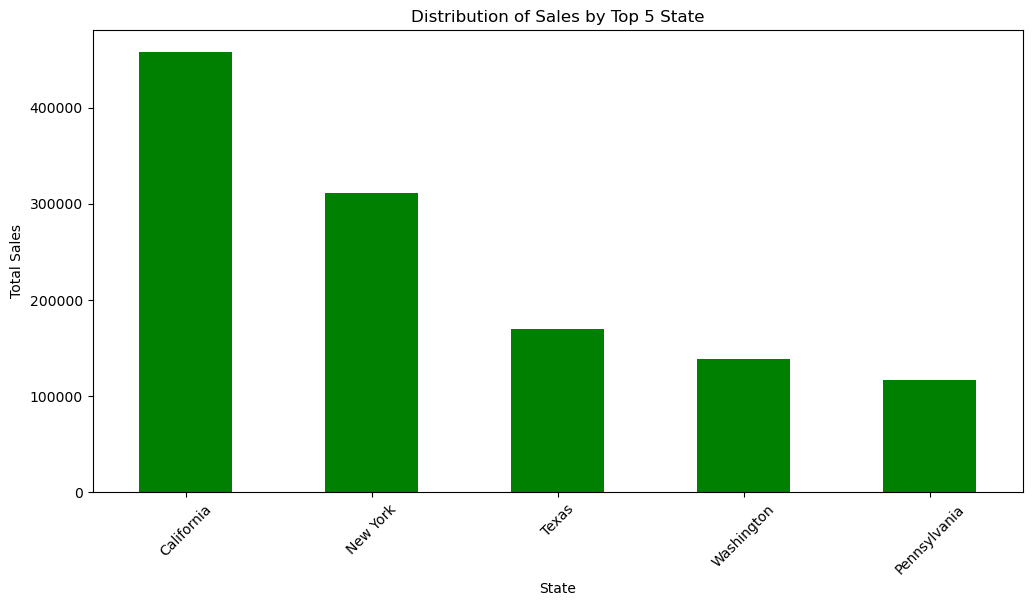

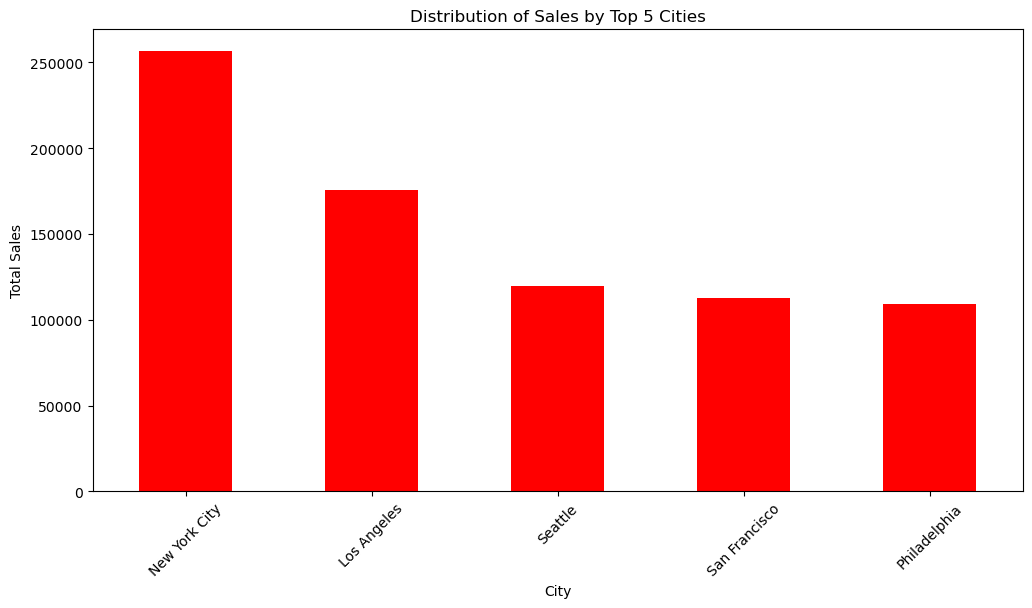

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'store_df' is your DataFrame containing sales store_df
# Group store_df by region and calculate total sales
region_sales = store_df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Plot distribution of sales by region
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='blue')
plt.title('Distribution of Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Group store_df by State and calculate total sales
state_sales = store_df.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Plot distribution of sales by country (top N countries for better visualization)
top_states = 5  # Change to desired number of top countries
plt.figure(figsize=(12, 6))
state_sales.head(top_states).plot(kind='bar', color='green')
plt.title(f'Distribution of Sales by Top {top_states} State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Group store_df by city and calculate total sales
city_sales = store_df.groupby('City')['Sales'].sum().sort_values(ascending=False)

# Plot distribution of sales by city (top N cities for better visualization)
top_cities = 5  # Change to desired number of top cities
plt.figure(figsize=(12, 6))
city_sales.head(top_cities).plot(kind='bar', color='red')
plt.title(f'Distribution of Sales by Top {top_cities} Cities')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [26]:
"""""Are there specific customer segments that tend to order more frequently or in larger quantities?
"""

'""Are there specific customer segments that tend to order more frequently or in larger quantities?\n'

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing customer data
# Group data by customer segments and calculate order frequency and average order quantity
segment_order_stats = store_df.groupby('Segment').agg({'OrderID': 'count', 'Quantity': 'mean'})

# Rename columns for clarity
segment_order_stats.rename(columns={'OrderID': 'OrderFrequency', 'Quantity': 'AvgOrderQuantity'}, inplace=True)

# Display the order frequency and average order quantity by segment
print("Order Frequency and Average Order Quantity by Segment:")
segment_order_stats


Order Frequency and Average Order Quantity by Segment:


,OrderFrequency,AvgOrderQuantity
Segment,,
Consumer,5191,3.760547
Corporate,3020,3.843709
Home Office,1783,3.782389


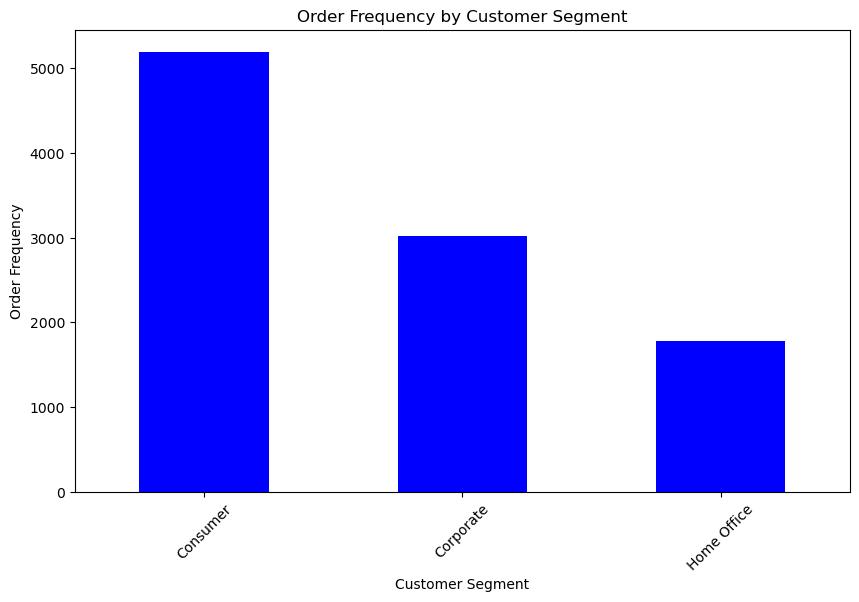

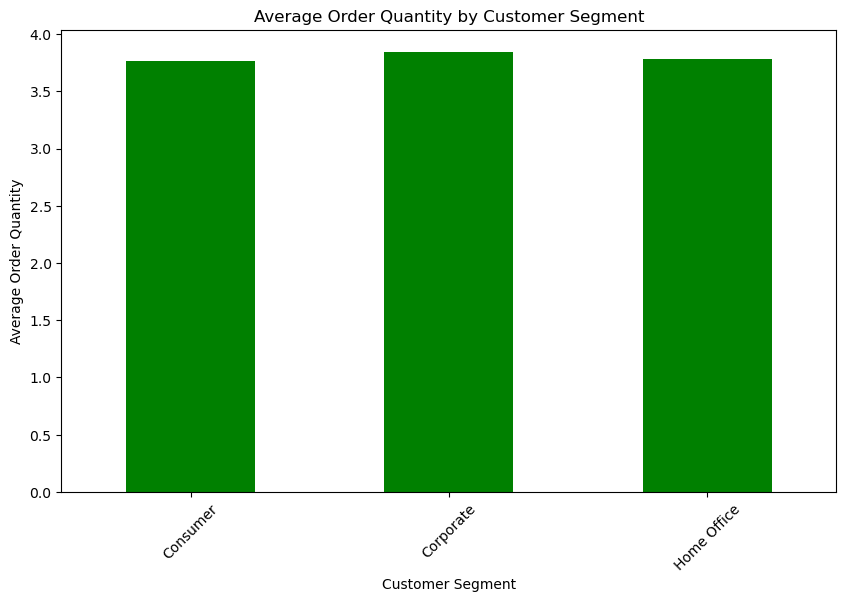

In [28]:

# Visualize the order frequency by segment
plt.figure(figsize=(10, 6))
segment_order_stats['OrderFrequency'].plot(kind='bar', color='blue')
plt.title('Order Frequency by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Order Frequency')
plt.xticks(rotation=45)
plt.show()

# Visualize the average order quantity by segment
plt.figure(figsize=(10, 6))
segment_order_stats['AvgOrderQuantity'].plot(kind='bar', color='green')
plt.title('Average Order Quantity by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Order Quantity')
plt.xticks(rotation=45)
plt.show()


### Product Analysis

In [29]:
"""Which product categories/subcategories contribute the most to sales/profit?
"""

'Which product categories/subcategories contribute the most to sales/profit?\n'

In [30]:



# Group data by product category and subcategory and calculate total sales and profit
category_sales_profit = store_df.groupby(['Category', 'SubCategory'])[['Sales', 'Profit']].sum()

# Reset index to make Category and SubCategory columns accessible
category_sales_profit.reset_index(inplace=True)

# Sort categories and subcategories by total sales and profit
category_sales_profit.sort_values(by='Sales', ascending=False, inplace=True)
category_sales_profit.sort_values(by='Profit', ascending=False, inplace=True)

# Display top contributing categories and subcategories
print("Top Contributing Categories and Subcategories:")
category_sales_profit.head(10)

Top Contributing Categories and Subcategories:


,Category,SubCategory,Sales,Profit
14,Technology,Copiers,149528.030,55617.8249
16,Technology,Phones,330007.054,44515.7306
13,Technology,Accessories,167380.318,41936.6357
10,Office Supplies,Paper,78479.206,34053.5693
6,Office Supplies,Binders,203412.733,30221.7633
1,Furniture,Chairs,328449.103,26590.1663
11,Office Supplies,Storage,223843.608,21278.8264
4,Office Supplies,Appliances,107532.161,18138.0054
2,Furniture,Furnishings,91705.164,13059.1436
7,Office Supplies,Envelopes,16476.402,6964.1767


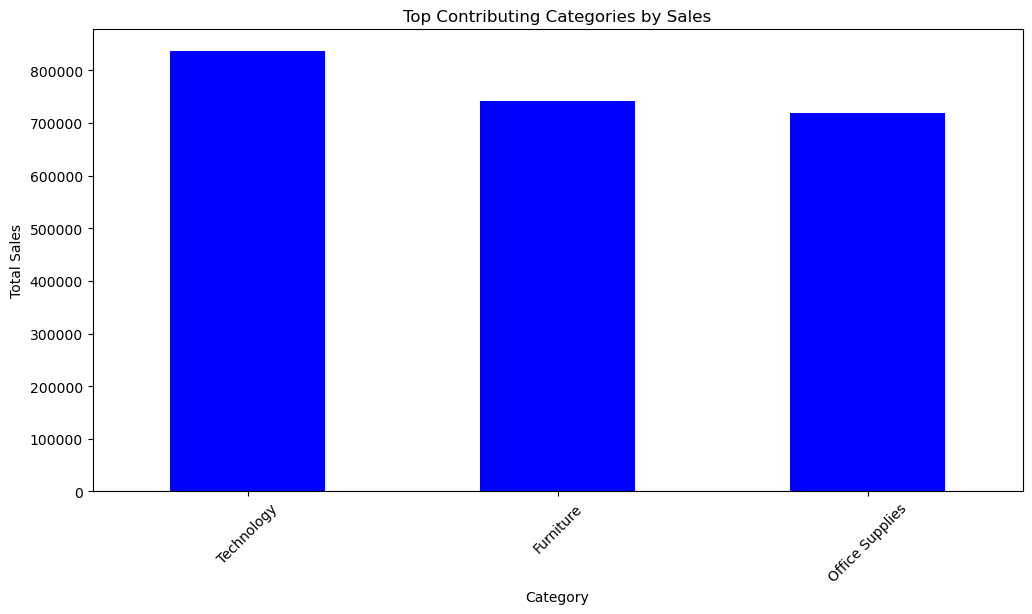

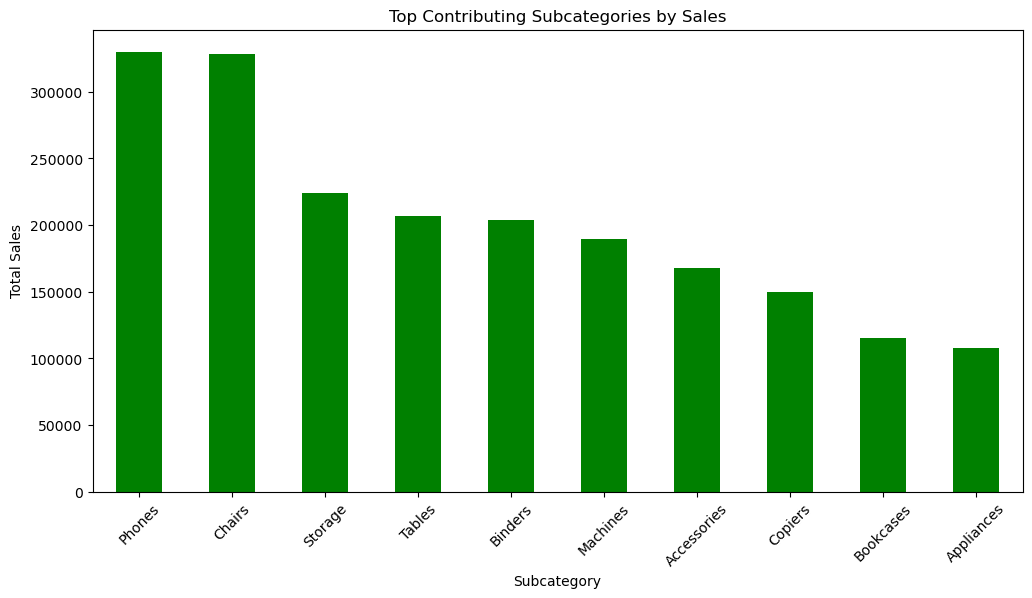

In [31]:


# Visualize top contributing categories by sales
plt.figure(figsize=(12, 6))
top_categories_sales = category_sales_profit.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(10)
top_categories_sales.plot(kind='bar', color='blue')
plt.title('Top Contributing Categories by Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Visualize top contributing subcategories by sales
plt.figure(figsize=(12, 6))
top_subcategories_sales = category_sales_profit.groupby('SubCategory')['Sales'].sum().sort_values(ascending=False).head(10)
top_subcategories_sales.plot(kind='bar', color='green')
plt.title('Top Contributing Subcategories by Sales')
plt.xlabel('Subcategory')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()




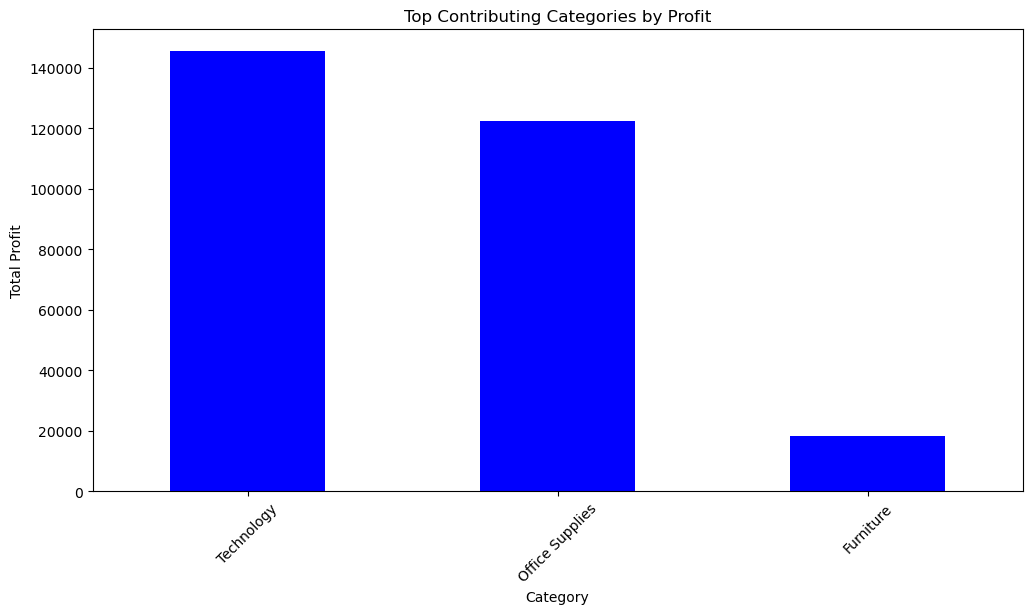

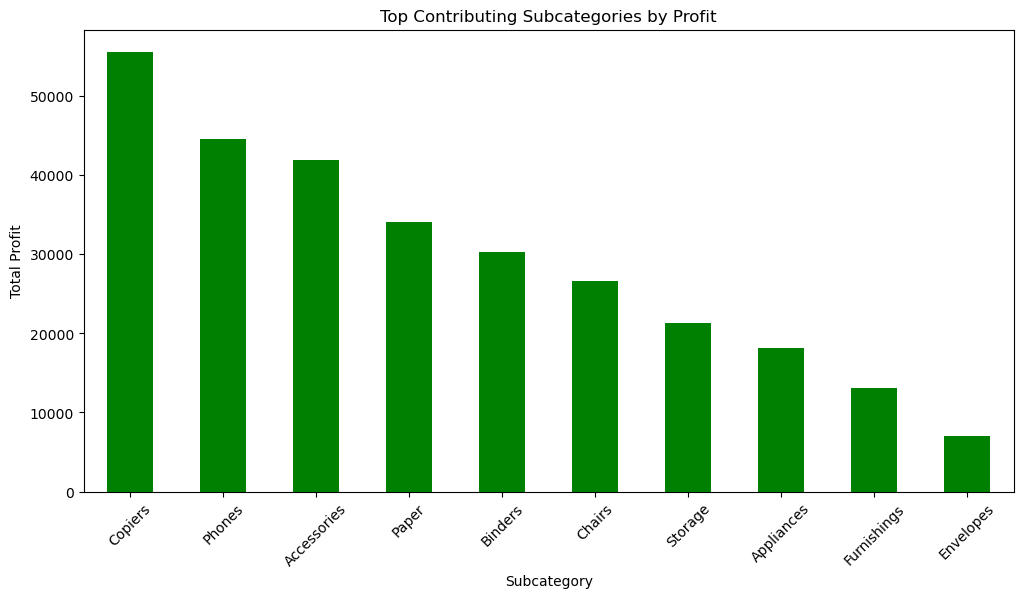

In [32]:


# Visualize top contributing categories by profit
plt.figure(figsize=(12, 6))
top_categories_sales = category_sales_profit.groupby('Category')['Profit'].sum().sort_values(ascending=False).head(10)
top_categories_sales.plot(kind='bar', color='blue')
plt.title('Top Contributing Categories by Profit')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

# Visualize top contributing subcategories by profit
plt.figure(figsize=(12, 6))
top_subcategories_sales = category_sales_profit.groupby('SubCategory')['Profit'].sum().sort_values(ascending=False).head(10)
top_subcategories_sales.plot(kind='bar', color='green')
plt.title('Top Contributing Subcategories by Profit')
plt.xlabel('Subcategory')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()




In [33]:
"""" What are the top-selling products by quantity and revenue?
"""

'" What are the top-selling products by quantity and revenue?\n'

In [34]:



# Group data by product ID and calculate total quantity sold and total revenue
product_sales = store_df.groupby('ProductName').agg({'Quantity': 'sum', 'Sales': 'sum'})

# Reset index to make ProductID column accessible
product_sales.reset_index(inplace=True)

# Sort products by total quantity and revenue
top_products_quantity = product_sales.sort_values(by='Quantity', ascending=False).head(10)
top_products_revenue = product_sales.sort_values(by='Sales', ascending=False).head(10)

# Display top-selling products by quantity
print("Top-selling products by quantity:")
print (top_products_quantity)

# Display top-selling products by revenue
print("\nTop-selling products by revenue:")
print (top_products_revenue)

Top-selling products by quantity:
                                            ProductName  Quantity     Sales
1499                                            Staples       215   755.470
1493                                    Staple envelope       170  1686.812
537                                   Easy-staple paper       150  2504.192
1500                            Staples in misc. colors        86   478.812
942                          KI Adjustable-Height Table        74  4552.641
259                             Avery Non-Stick Binders        71   217.316
1511                            Storex Dura Pro Binders        71   278.586
699   GBC Premium Transparent Covers with Diagonal L...        67   780.456
1450         Situations Contoured Folding Chairs, 4/Set        64  3641.274
1497                         Staple-based wall hangings        62   422.288

Top-selling products by revenue:
                                           ProductName  Quantity      Sales
404              Can

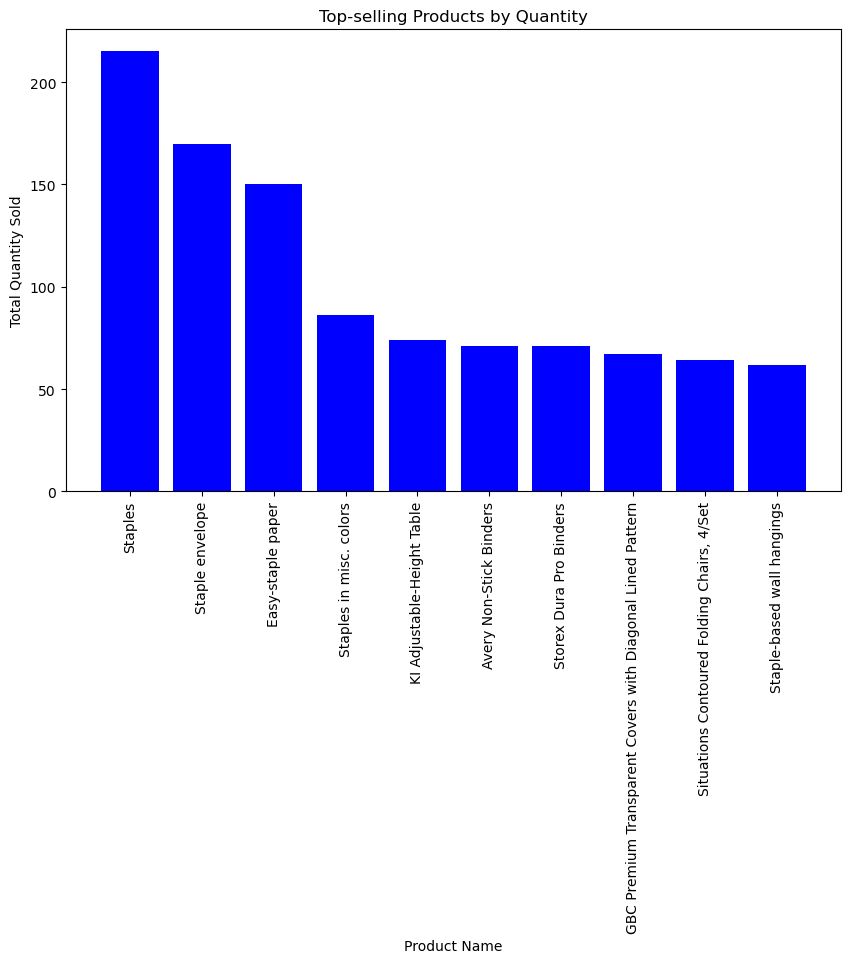

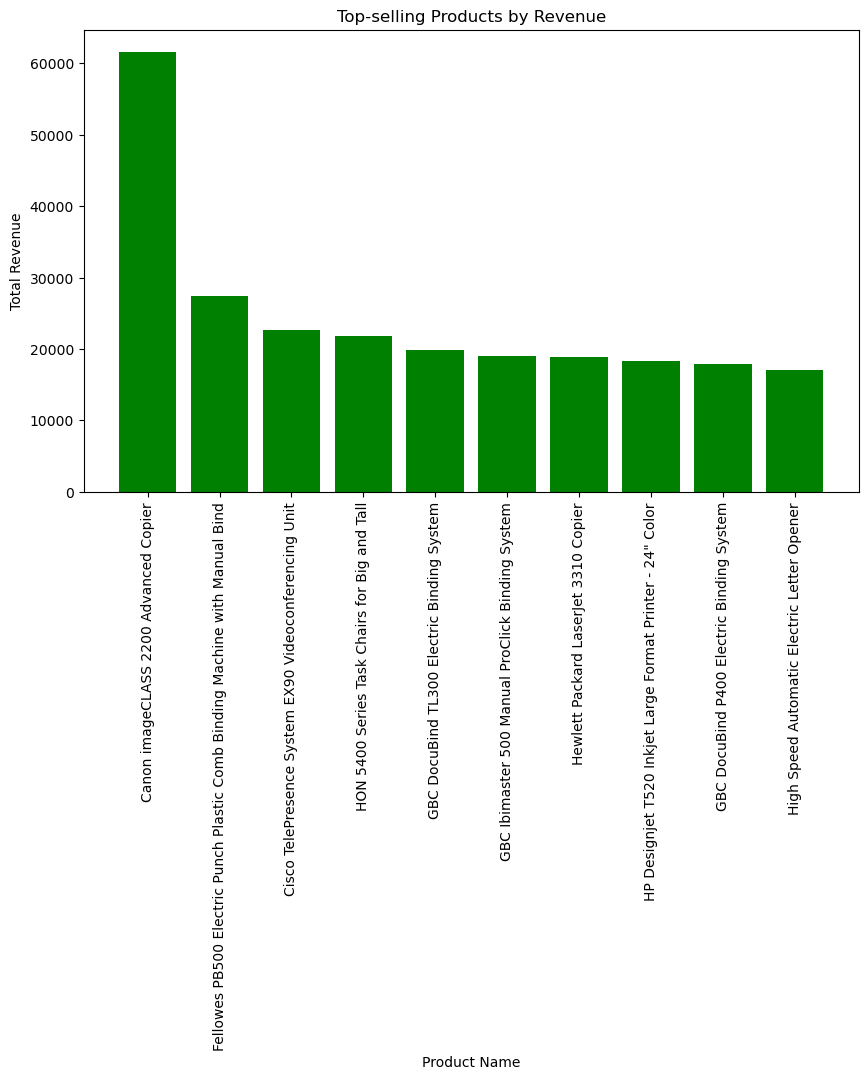

In [35]:


# Visualize top-selling products by quantity
plt.figure(figsize=(10, 6))
plt.bar(top_products_quantity['ProductName'], top_products_quantity['Quantity'], color='blue')
plt.title('Top-selling Products by Quantity')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.show()

# Visualize top-selling products by revenue
plt.figure(figsize=(10, 6))
plt.bar(top_products_revenue['ProductName'], top_products_revenue['Sales'], color='green')
plt.title('Top-selling Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()


In [36]:
""""Is there any correlation between product price and sales/profit margin?
"""

'"Is there any correlation between product price and sales/profit margin?\n'

In [37]:


# Calculate profit margin
store_df['ProfitMargin'] = (store_df['Profit'] / store_df['Sales']) * 100

# Analyze correlation between product price and sales or profit margin
price_sales_corr = store_df['ProductPrice'].corr(store_df['Sales'])
price_profit_margin_corr = store_df['ProductPrice'].corr(store_df['ProfitMargin'])

print("Correlation between Product Price and Sales:", price_sales_corr)
print("Correlation between Product Price and Profit Margin:", price_profit_margin_corr)


Correlation between Product Price and Sales: 0.8565672225006515
Correlation between Product Price and Profit Margin: -0.081396949221154


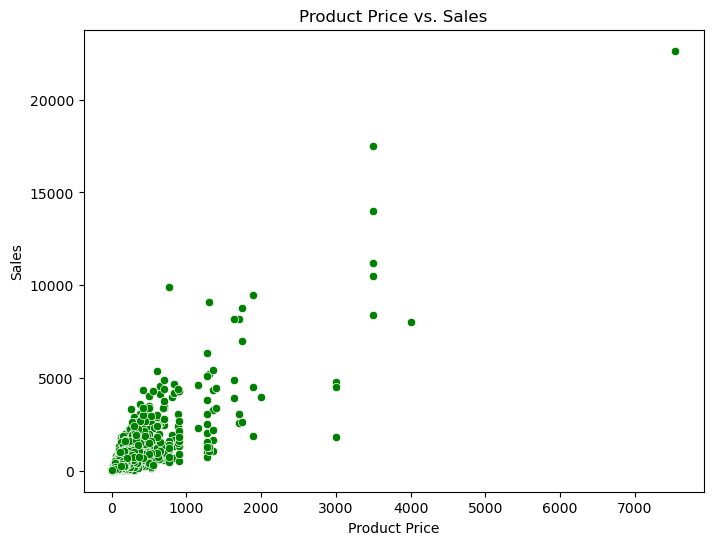

In [38]:


# Visualize the relationship between product price and sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ProductPrice', y='Sales', data=store_df, color='green')
plt.title('Product Price vs. Sales')
plt.xlabel('Product Price')
plt.ylabel('Sales')
plt.show()


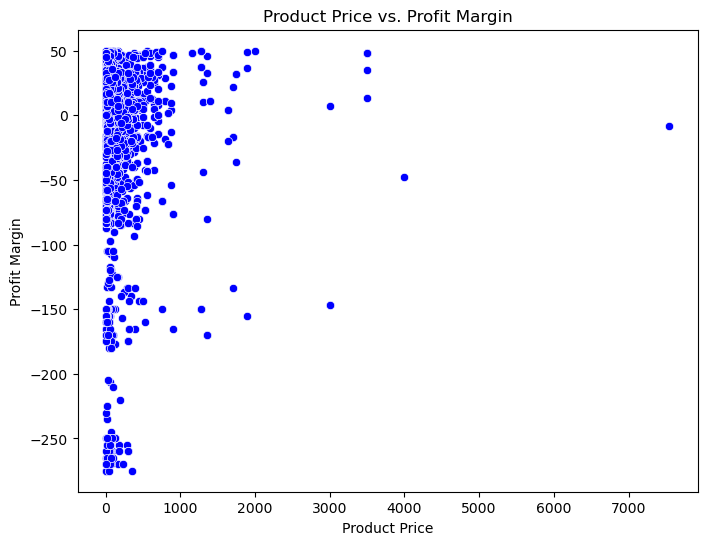

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ProductPrice', y='ProfitMargin', data=store_df, color='blue')
plt.title('Product Price vs. Profit Margin')
plt.xlabel('Product Price')
plt.ylabel('Profit Margin')
plt.show()

c:\Users\godwi\Downloads\Anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\godwi\Downloads\Anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


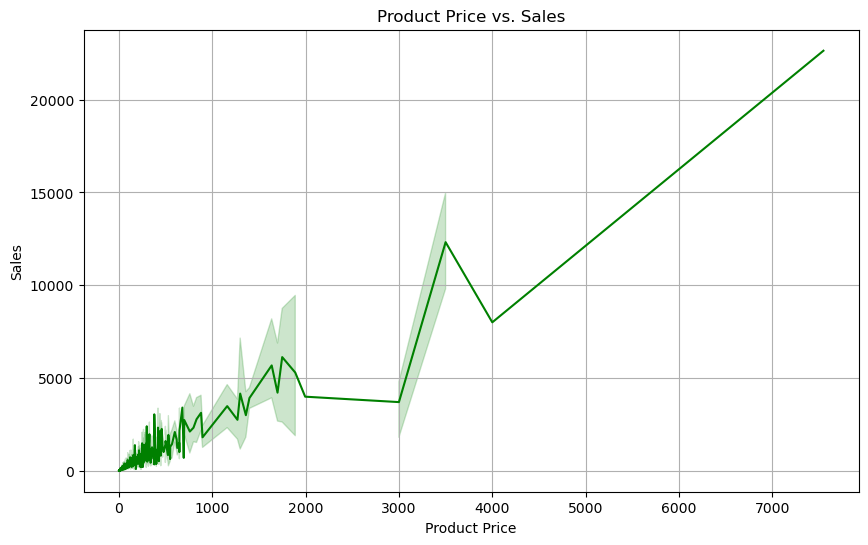

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by ProductPrice for a smooth line plot
store_df_sorted = store_df.sort_values(by='ProductPrice')

# Visualize the relationship between product price and sales using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='ProductPrice', y='Sales', data=store_df_sorted, color='green')
plt.title('Product Price vs. Sales')
plt.xlabel('Product Price')
plt.ylabel('Sales')
plt.grid(True)  # Add grid for better readability
plt.show()


### Sales Performance

In [41]:
""""
How does sales performance vary across different regions or states?
"""


'"\nHow does sales performance vary across different regions or states?\n'

In [42]:
region_sales

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

c:\Users\godwi\Downloads\Anconda\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


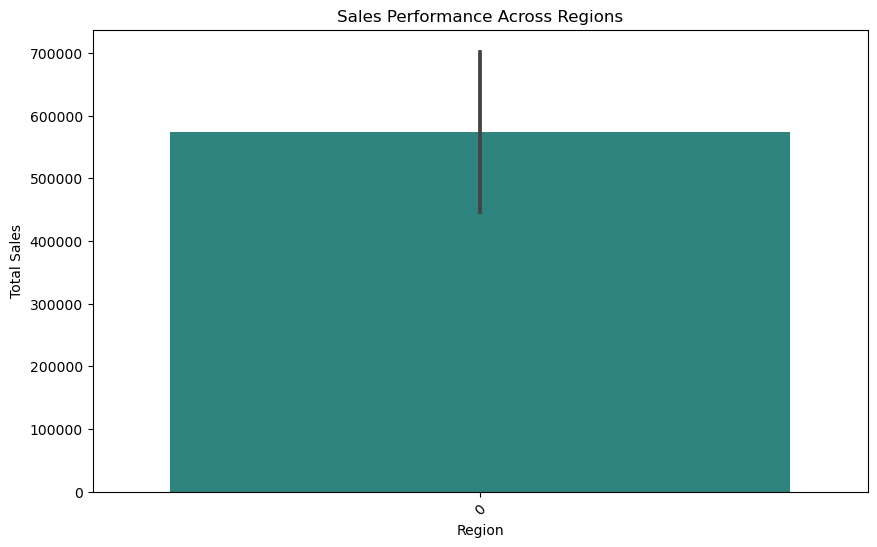

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize sales performance across different regions
plt.figure(figsize=(10, 6))
sns.barplot(data=region_sales, palette='viridis')
plt.title('Sales Performance Across Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


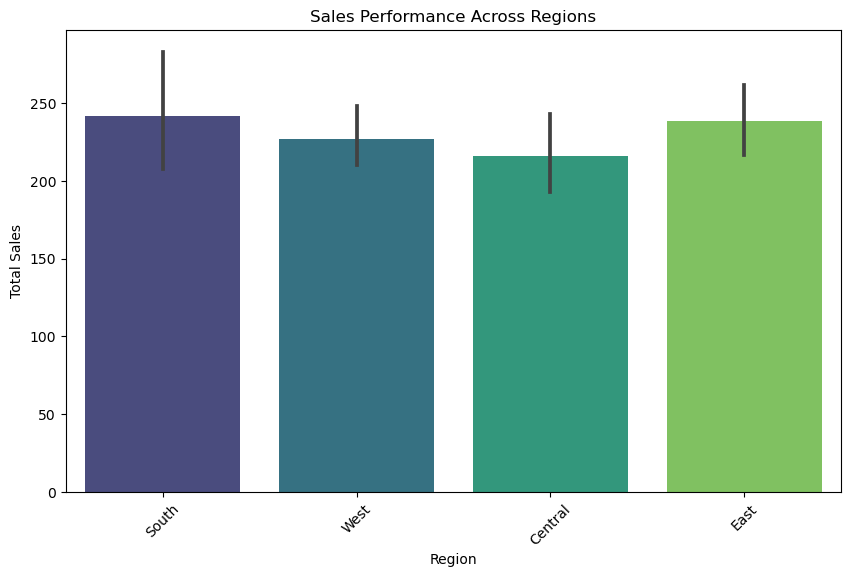

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize sales performance across different regions
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=store_df, palette='viridis')
plt.title('Sales Performance Across Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [45]:
"""Are there any significant differences in sales/profit based on shipping mode?
"""

'Are there any significant differences in sales/profit based on shipping mode?\n'

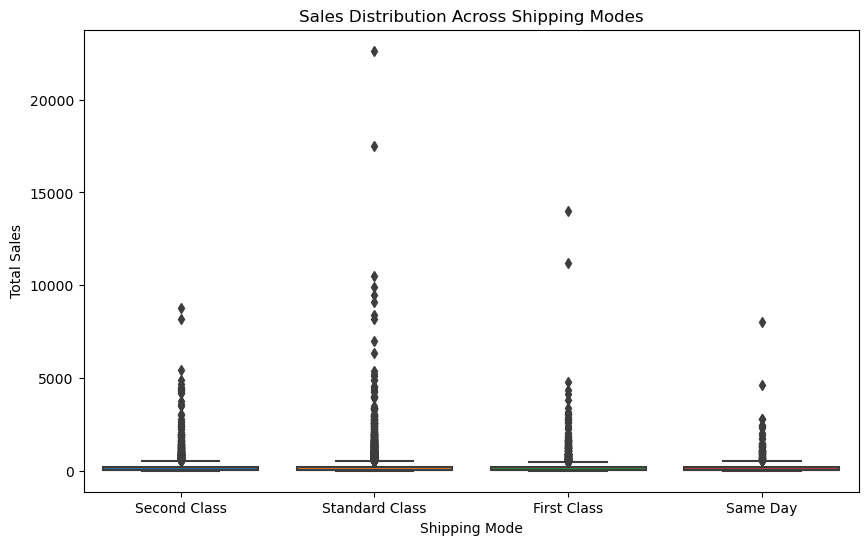

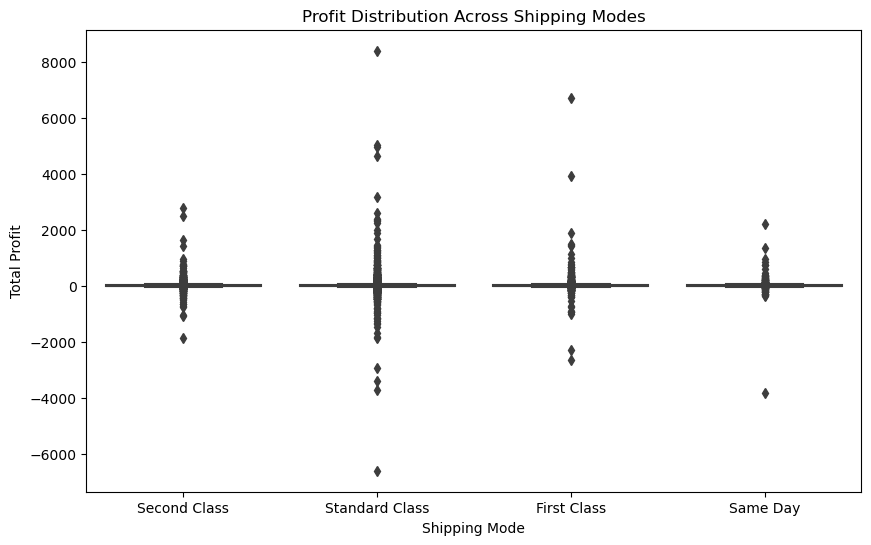

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt


# Group data by shipping mode and calculate total sales and profit
shipping_mode_sales_profit = store_df.groupby('ShipMode')[['Sales', 'Profit']].sum().reset_index()

# Visualize sales distribution across different shipping modes using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='ShipMode', y='Sales', data=store_df)
plt.title('Sales Distribution Across Shipping Modes')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales')
plt.show()

# Visualize profit distribution across different shipping modes using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='ShipMode', y='Profit', data=store_df)
plt.title('Profit Distribution Across Shipping Modes')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Profit')
plt.show()


In [47]:
""""Is there a relationship between discount rates and sales/profit margins?
""""

SyntaxError: unterminated string literal (detected at line 2) (878643209.py, line 2)

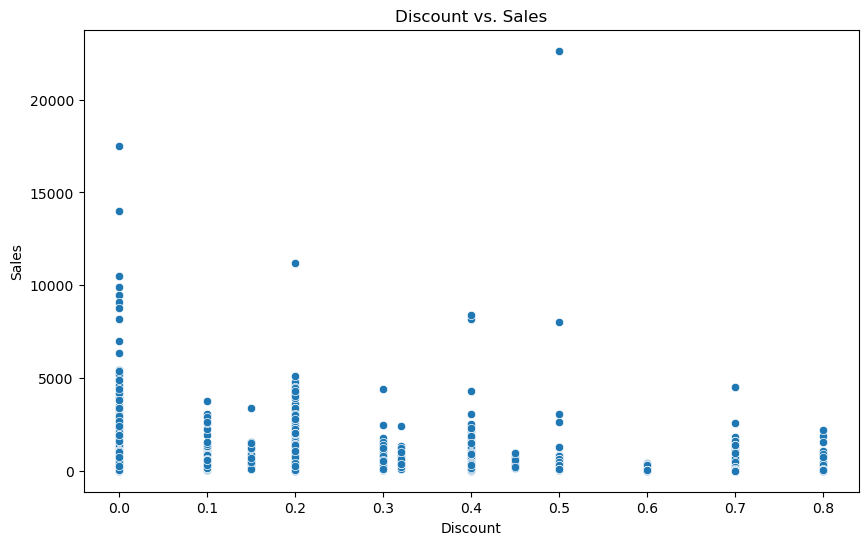

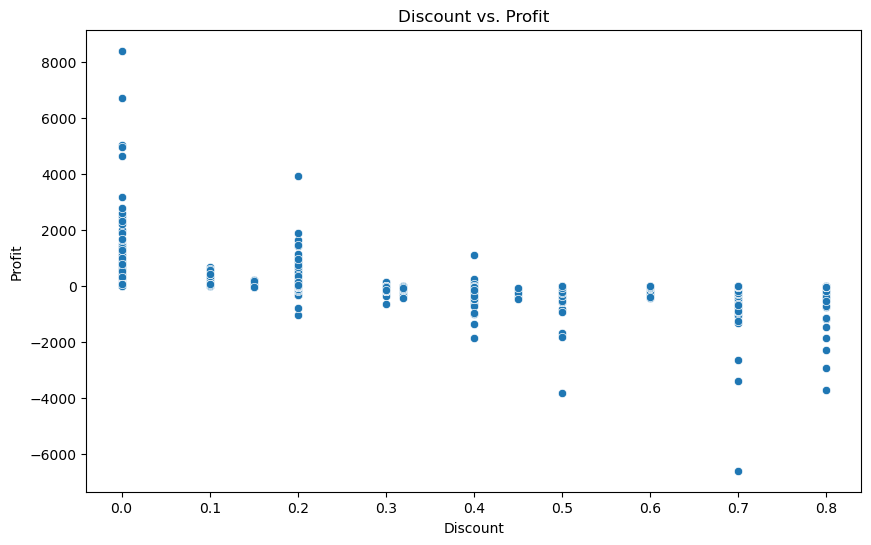

In [ ]:

# Scatter plot of discount rates vs. sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Sales', data=store_df)
plt.title('Discount vs. Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

# Scatter plot of discount rates vs. profit margins
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=store_df)
plt.title('Discount vs. Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


In [ ]:
# Calculate correlation coefficient between discount rates and sales
sales_correlation = store_df['Discount'].corr(store_df['Sales'])
print("Correlation coefficient between discount rates and sales:", sales_correlation)

# Calculate correlation coefficient between discount rates and profit margins
profit_correlation = store_df['Discount'].corr(store_df['Profit'])
print("Correlation coefficient between discount rates and profit margins:", profit_correlation)


Correlation coefficient between discount rates and sales: -0.028190124157535475
Correlation coefficient between discount rates and profit margins: -0.2194874563717678


In [ ]:
"""Positive correlation coefficients indicate a positive relationship (as discount rates increase, sales/profit margins also increase), while negative correlation coefficients indicate a negative relationship. If the correlation coefficient is close to zero, there may be no significant linear relationship between the variables. 
"""


### Profitability Analysis

In [ ]:
"""What is the overall profitability of the business, and how does it vary over time?
"""

c:\Users\godwi\Downloads\Anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\godwi\Downloads\Anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


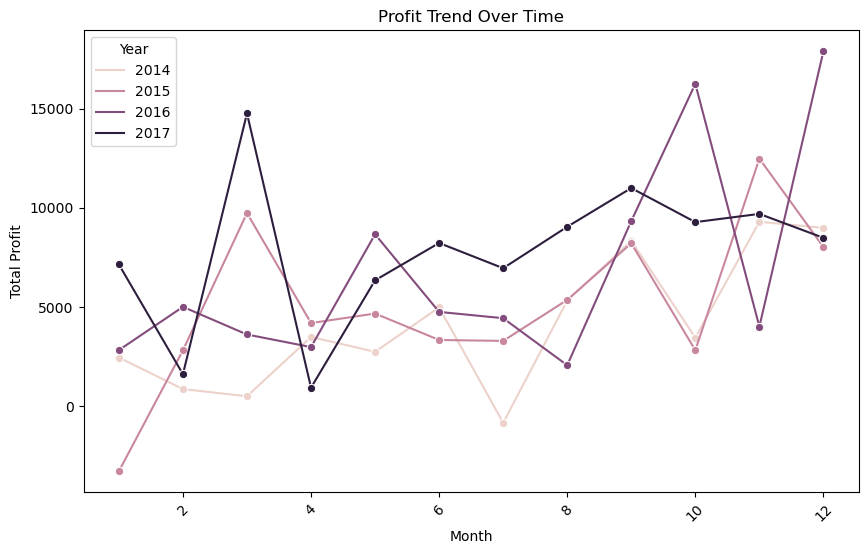

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'store_df' is your DataFrame containing sales data

# Convert 'OrderDate' to datetime if it's not already in datetime format
store_df['OrderDate'] = pd.to_datetime(store_df['OrderDate'])

# Extract year and month from the 'OrderDate' column
store_df['OrderYear'] = store_df['OrderDate'].dt.year
store_df['OrderMonth'] = store_df['OrderDate'].dt.month

# Group by year and month and calculate total profit for each month
profit_by_month = store_df.groupby(['OrderYear', 'OrderMonth'])['Profit'].sum().reset_index()

# Visualize profit trends over time using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='OrderMonth', y='Profit', hue='OrderYear', data=profit_by_month, marker='o')
plt.title('Profit Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.show()


Overall profitability of the business: 286397.0217


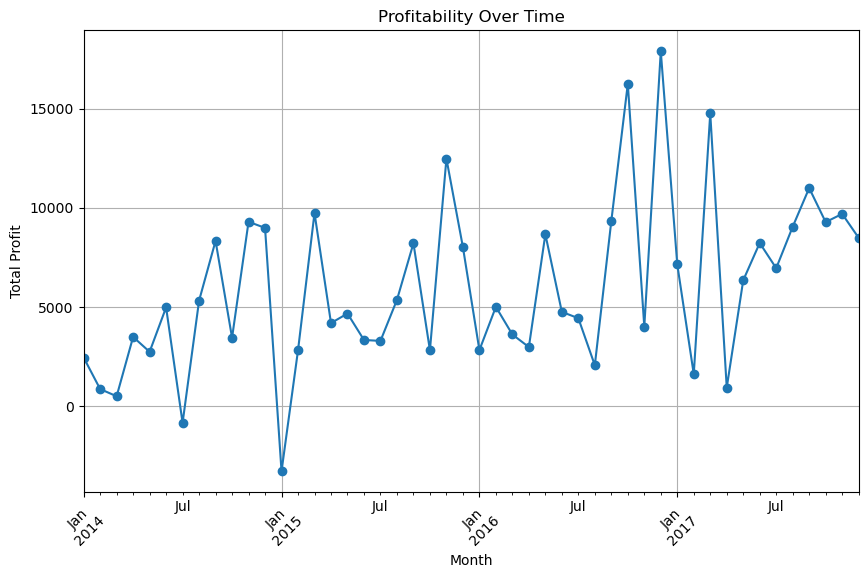

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'store-df' is your DataFrame containing sales store-df
# Calculate overall profitability
overall_profit = store_df['Profit'].sum()
print("Overall profitability of the business:", overall_profit)

# Convert OrderDate to datetime format if needed
store_df['OrderDate'] = pd.to_datetime(store_df['OrderDate'])

# Group store-df by month and calculate total profit for each month
monthly_profit = store_df.groupby(store_df['OrderDate'].dt.to_period('M'))['Profit'].sum()

# Plot profitability over time (monthly)
plt.figure(figsize=(10, 6))
monthly_profit.plot(marker='o', linestyle='-')
plt.title('Profitability Over Time')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
"""
  - Are there any specific products or categories with consistently high or low profit margins?
"""

In [ ]:
import pandas as pd

# Calculate profit margin for each product
store_df['ProfitMargin'] = (store_df['Profit'] / store_df['Sales']) * 100

# Group store_df by product or category and calculate average profit margin
avg_profit_margin = store_df.groupby('Category')['ProfitMargin'].mean()

# Identify products with consistently high or low profit margins
high_profit_category = avg_profit_margin[avg_profit_margin > 10]  # threshold for high profit margin
low_profit_category = avg_profit_margin[avg_profit_margin < 10]   # threshold for low profit margin

# Repeat the process for categories if needed


In [ ]:
high_profit_category

Category
Office Supplies    13.803029
Technology         15.613805
Name: ProfitMargin, dtype: float64

In [ ]:
low_profit_category

Category
Furniture    3.878353
Name: ProfitMargin, dtype: float64

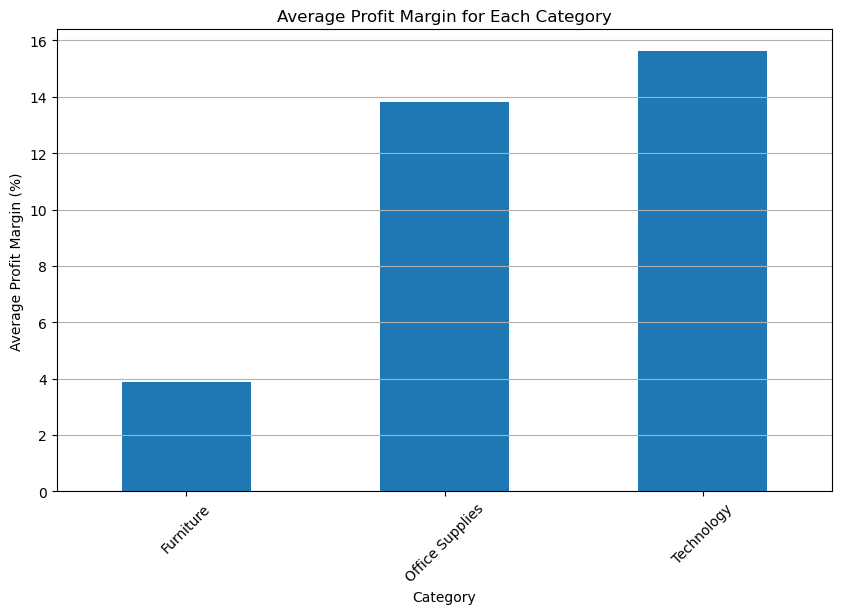

In [ ]:
import matplotlib.pyplot as plt
# Plotting average profit margin for each product 
plt.figure(figsize=(10, 6))
avg_profit_margin.plot(kind='bar')
plt.title('Average Profit Margin for Each Category')
plt.xlabel('Category')
plt.ylabel('Average Profit Margin (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
"""
How does the supplier price compared to the sales price affect profitability
"""

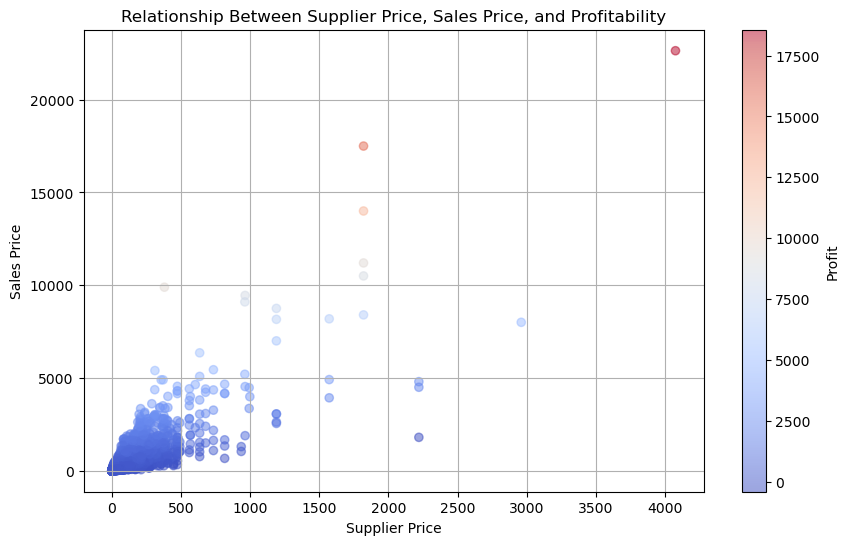

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate profit for each transaction
store_df['Profit'] = store_df['Sales'] - store_df['SupplierPrice']

# Plot the relationship between supplier price, sales price, and profitability
plt.figure(figsize=(10, 6))
plt.scatter(store_df['SupplierPrice'], store_df['Sales'], c=store_df['Profit'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Profit')
plt.xlabel('Supplier Price')
plt.ylabel('Sales Price')
plt.title('Relationship Between Supplier Price, Sales Price, and Profitability')
plt.grid(True)
plt.show()


In [ ]:
## Question from LMS
##1
"""Are there specific days/months/quarters when the sales have been unusually high/low, and what could be the possible reasons? How about the profit and loss margin?"""

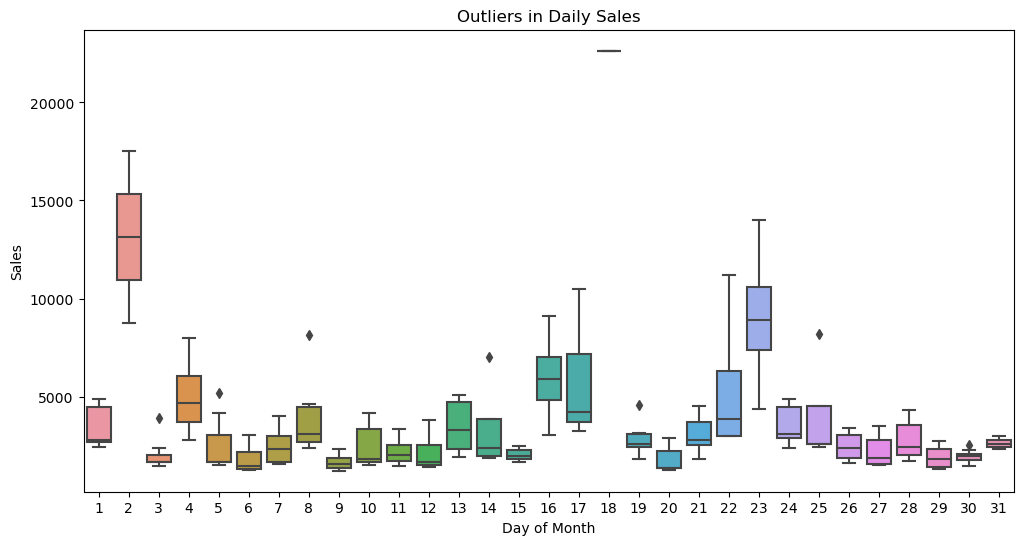

NameError: name 'outliers_margin' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day', y='Sales', data=outliers_sales)
plt.title('Outliers in Daily Sales')
plt.xlabel('Day of Month')
plt.ylabel('Sales')
plt.show()

# Visualize outliers in profit margin
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day', y='ProfitMargin', data=outliers_margin)
plt.title('Outliers in Daily Profit Margin')
plt.xlabel('Day of Month')
plt.ylabel('Profit Margin (%)')
plt.show()


In [ ]:
###2
""""
Which states and which customers made the highest number of orders? Are they the same as the highest spending states and customers?
"""

In [ ]:
import pandas as pd

# Assuming 'store_df' is your DataFrame containing order store_df

# Group by state and count the number of orders
orders_by_state = store_df.groupby('State')['OrderID'].count().reset_index()
# Find the state with the highest number of orders
state_highest_orders = orders_by_state.loc[orders_by_state['OrderID'].idxmax()]

# Group by customer ID and count the number of orders
orders_by_customer = store_df.groupby('CustomerName')['OrderID'].count().reset_index()
# Find the customer with the highest number of orders
customer_highest_orders = orders_by_customer.loc[orders_by_customer['OrderID'].idxmax()]

# Group by state and sum the total sales
sales_by_state = store_df.groupby('State')['Sales'].sum().reset_index()
# Find the state with the highest total sales
state_highest_sales = sales_by_state.loc[sales_by_state['Sales'].idxmax()]

# Group by customer ID and sum the total sales
sales_by_customer = store_df.groupby('CustomerName')['Sales'].sum().reset_index()
# Find the customer with the highest total sales
customer_highest_sales = sales_by_customer.loc[sales_by_customer['Sales'].idxmax()]

print("State with the highest number of orders:", state_highest_orders['State'])
print("Customer with the highest number of orders:", customer_highest_orders['CustomerName'])
print("State with the highest total sales:", state_highest_sales['State'])
print("Customer with the highest total sales:", customer_highest_sales['CustomerName'])


State with the highest number of orders: California
Customer with the highest number of orders: William Brown
State with the highest total sales: California
Customer with the highest total sales: Sean Miller


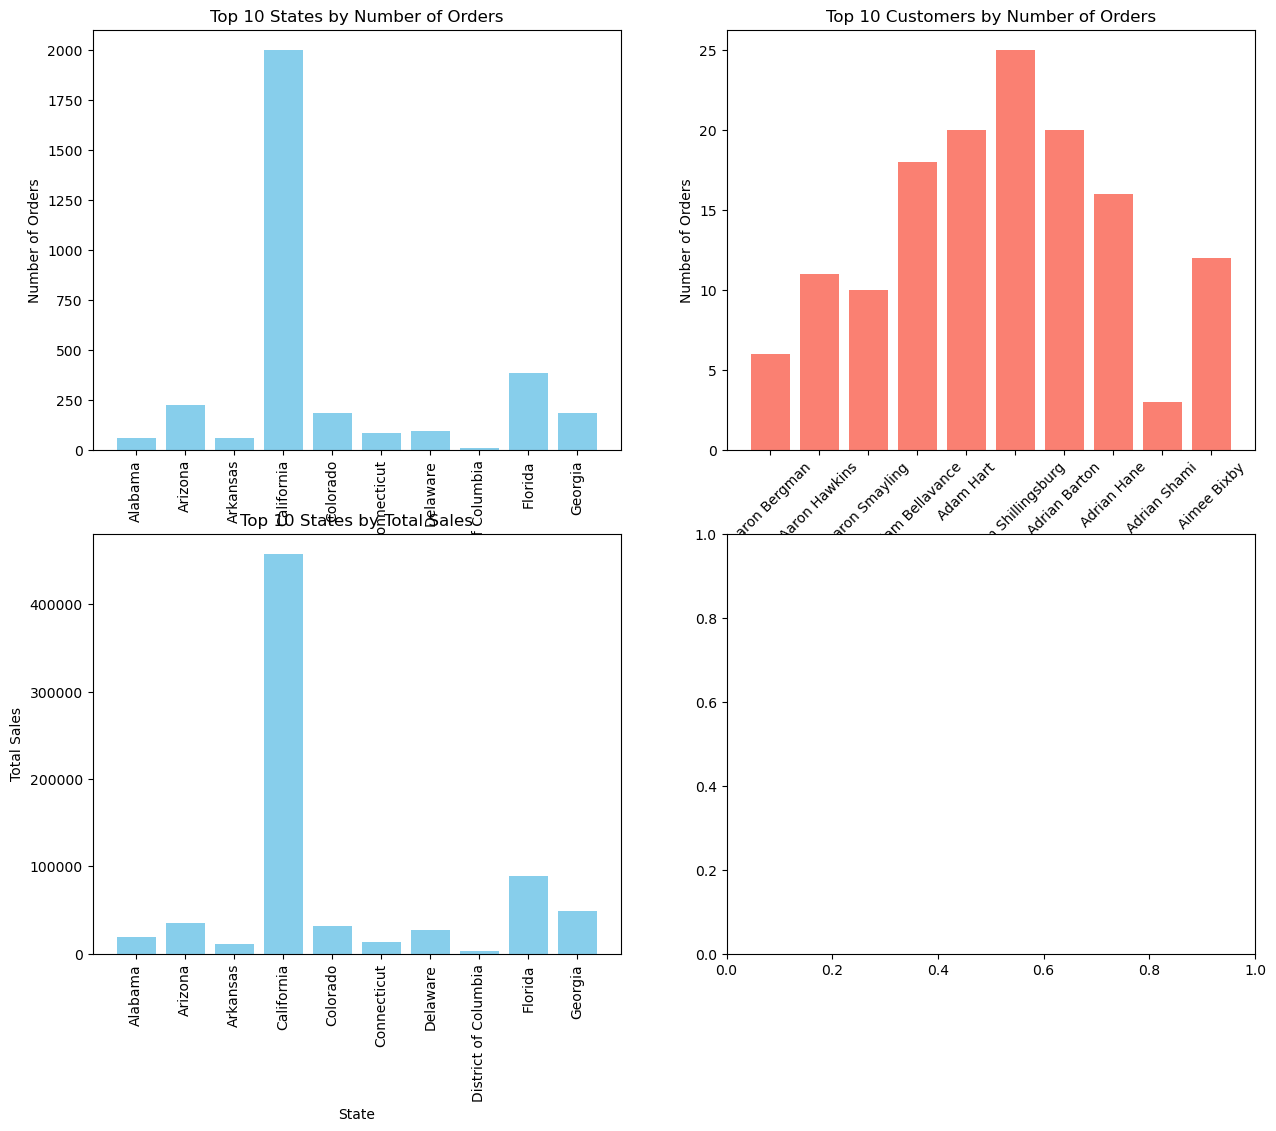

In [ ]:
import matplotlib.pyplot as plt

# Get the top 10 states and customers with the highest number of orders
top_10_states_orders = orders_by_state.head(10)
top_10_customers_orders = orders_by_customer.head(10)

# Get the top 10 states and customers with the highest total sales
top_10_states_sales = sales_by_state.head(10)
top_10_customers_sales = sales_by_customer.head(10)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Plot top 10 orders by state
axes[0, 0].bar(top_10_states_orders['State'], top_10_states_orders['OrderID'], color='skyblue')
axes[0, 0].set_title('Top 10 States by Number of Orders')
axes[0, 0].set_xlabel('State')
axes[0, 0].set_ylabel('Number of Orders')
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot top 10 orders by customer
axes[0, 1].bar(top_10_customers_orders['CustomerName'], top_10_customers_orders['OrderID'], color='salmon')
axes[0, 1].set_title('Top 10 Customers by Number of Orders')
axes[0, 1].set_xlabel('Customer Name')
axes[0, 1].set_ylabel('Number of Orders')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot top 10 sales by state
axes[1, 0].bar(top_10_states_sales['State'], top_10_states_sales['Sales'], color='skyblue')
axes[1, 0].set_title('Top 10 States by Total Sales')
axes[1, 0].set_xlabel('State')
axes[1, 0].set_ylabel('Total Sales')
axes[1, 0].tick_params(axis='x', rotation=90)


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile for US states
us_states = gpd.read_file('path_to_your_shapefile')

# Merge the shapefile with your sales data
us_states_sales = us_states.merge(sales_by_state, how='left', left_on='State', right_index=True)

# Sort the data by sales revenue
us_states_sales_sorted = us_states_sales.sort_values(by='Sales', ascending=False)

# Get the top 5 and bottom 5 states by sales revenue
top_5_states = us_states_sales_sorted.head(5)
bottom_5_states = us_states_sales_sorted.tail(5)

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the top 5 states
top_5_states.plot(ax=ax, color='green', edgecolor='black', linewidth=0.5, legend=True)
# Plot the bottom 5 states
bottom_5_states.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5, legend=True)

# Add title and legend
ax.set_title('Top and Bottom 5 States by Sales Revenue')
ax.legend(['Top 5 States', 'Bottom 5 States'])

# Show plot
plt.show()


ModuleNotFoundError: No module named 'geopandas'

In [ ]:
sales_df=store_df[["State","Sales"]]

In [ ]:
sales_df

,State,Sales
0,Kentucky,261.9600
1,Kentucky,731.9400
2,California,14.6200
3,Florida,957.5775
4,Florida,22.3680
...,...,...
9989,Florida,25.2480
9990,California,91.9600
9991,California,258.5760
9992,California,29.6000


In [ ]:
import folium


ModuleNotFoundError: No module named 'folium'

In [ ]:
import folium
import pandas as pd

# Sample data containing sales revenue for each state
#sales_data = {
  #  'State': ['California', 'Texas', 'New York', 'Florida', 'Illinois'],
  #  'Sales': [1000000, 800000, 600000, 400000, 200000]
#}

# Convert data to a DataFrame
#sales_df = pd.DataFrame(sales_data)

# Sort the data by sales revenue
sales_df_sorted = sales_df.sort_values(by='Sales', ascending=False)

# Get the top 5 and bottom 5 states by sales revenue
top_5_states = sales_df_sorted.head(5)
bottom_5_states = sales_df_sorted.tail(5)

# Create a Folium map centered around the United States
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add markers for the top 5 states
for index, row in top_5_states.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=row['State'] + ': $' + str(row['Sales']),
                  icon=folium.Icon(color='green')).add_to(m)

# Add markers for the bottom 5 states
for index, row in bottom_5_states.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=row['State'] + ': $' + str(row['Sales']),
                  icon=folium.Icon(color='red')).add_to(m)

# Display the map
m


ModuleNotFoundError: No module named 'folium'

In [ ]:
"""
Can we see the quarterly revenue behavior?
"""

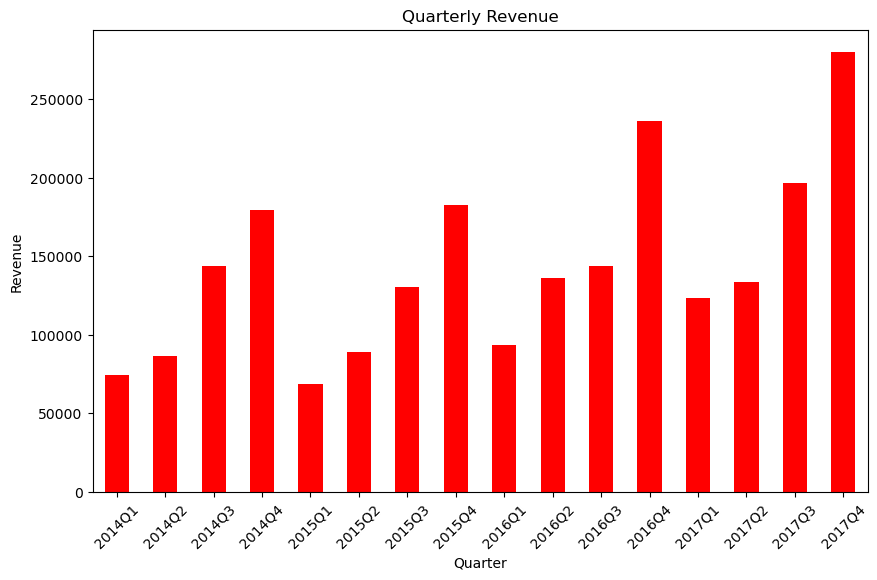

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is named 'store_df' and it contains an 'OrderDate' and 'Sales' column

# Convert 'OrderDate' column to datetime format
store_df['OrderDate'] = pd.to_datetime(store_df['OrderDate'])

# Extract the quarter from the 'OrderDate' column
store_df['Quarter'] = store_df['OrderDate'].dt.to_period('Q')

# Aggregate sales revenue by quarter
quarterly_revenue = store_df.groupby('Quarter')['Sales'].sum()

# Plot the quarterly revenue
plt.figure(figsize=(10, 6))
quarterly_revenue.plot(kind='bar', color='red')
plt.title('Quarterly Revenue')
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


In [ ]:
"""Can you create a plot showing the growth rate of new customers over the months?""""

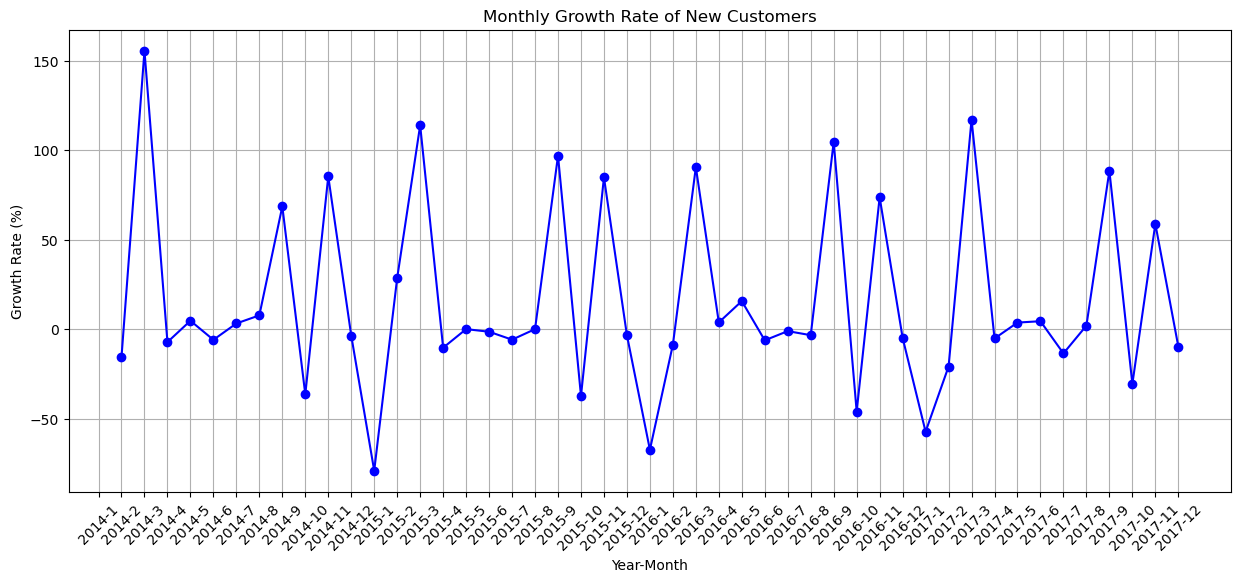

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'store_df' is your store_dfFrame containing customer store_df with an 'OrderDate' column
# Convert 'OrderDate' column to datetime format
store_df['OrderDate'] = pd.to_datetime(store_df['OrderDate'])

# Extract year and month from the 'OrderDate' column
store_df['Year'] = store_df['OrderDate'].dt.year
store_df['Month'] = store_df['OrderDate'].dt.month

# Group by year and month and count the number of unique customers
monthly_customers = store_df.groupby(['Year', 'Month'])['CustomerID'].nunique().reset_index()

# Calculate the monthly growth rate of new customers
monthly_customers['NewCustomers'] = monthly_customers['CustomerID'].diff()
monthly_customers['GrowthRate'] = monthly_customers['NewCustomers'] / monthly_customers['CustomerID'].shift() * 100

# Plot the growth rate of new customers over the months
plt.figure(figsize=(15, 6))
plt.plot(monthly_customers['Year'].astype(str) + '-' + monthly_customers['Month'].astype(str), monthly_customers['GrowthRate'], marker='o', color='b', linestyle='-')
plt.title('Monthly Growth Rate of New Customers')
plt.xlabel('Year-Month')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
import plotly.express as px

# Animated line plot for monthly sales over time
fig_sales = px.line(monthly_sales_profit, x='OrderMonth', y='Sales', animation_frame='OrderYear', 
                    title='Monthly Sales Over Time', labels={'OrderMonth': 'Month', 'Sales': 'Total Sales'})

# Animated line plot for monthly profit over time
fig_profit = px.line(monthly_sales_profit, x='OrderMonth', y='Profit', animation_frame='OrderYear', 
                     title='Monthly Profit Over Time', labels={'OrderMonth': 'Month', 'Profit': 'Total Profit'})

fig_sales.show()
fig_profit.show()
